In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
dir(boston_housing)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_data',
 'np',
 'print_function']

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
train_labels.shape

(404,)

In [6]:
test_data.shape

(102, 13)

In [7]:
test_labels.shape

(102,)

* normalize the features

In [8]:
import numpy as np

In [9]:
def normalize(data):
    result = np.zeros(data.shape)
    for i in range(data.shape[1]):
        # features = data[:][i] -> wrong because this retrieves the ith row of data
        features = data[:, i]
        mean = np.mean(features)
        std = np.std(features)
        features = (features - mean) / std
        for j, f in enumerate(features):
            result[j][i] = f
    return result

In [10]:
norm_train_data = normalize(train_data)

In [11]:
norm_test_data = normalize(test_data)

In [12]:
from keras import models
from keras import layers

In [13]:
def my_build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [14]:
model = my_build_model()

In [15]:
model.fit(norm_train_data, train_labels, epochs=80, batch_size=16, verbose=0)
model.evaluate(norm_test_data, test_labels)

102/102 [==============================] - 0s 226us/step


[17.71999433928845, 2.940929712033739]

# book code

In [78]:
mean = train_data.mean(axis=0)

In [79]:
mean.shape

(13,)

In [80]:
std = train_data.std(axis=0)

In [81]:
std.shape

(13,)

In [82]:
train_data = (train_data - mean) / std

In [83]:
train_data.shape[1]

13

In [84]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [46]:
num_epochs = 200
k = 4
all_mae_history = []
fold_size = len(train_data)//k # use // or fold_size becomes float number
for i in range(k):
    print('processing fold #', i)
    x_val = train_data[fold_size*i : fold_size*(i+1)]
    y_val = train_labels[fold_size*i : fold_size*(i+1)]
    x_train = np.concatenate((train_data[:fold_size*i], train_data[fold_size*(i+1):]), axis=0)
    y_train = np.concatenate((train_labels[:fold_size*i], train_labels[fold_size*(i+1):]), axis=0)
    model = build_model()
    history = model.fit(x_train, y_train, 
                        batch_size=1, epochs=num_epochs, verbose=0, 
                        validation_data=(x_val, y_val))
    all_mae_history.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [47]:
all_mae_history = np.asarray(all_mae_history).mean(axis=0)

In [48]:
import matplotlib.pyplot as plt

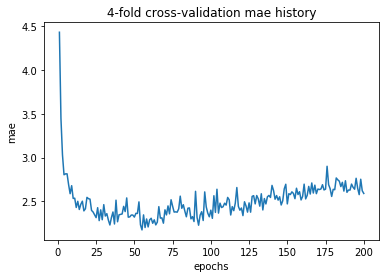

In [51]:
epochs = [i+1 for i in range(num_epochs)]
plt.plot(epochs, all_mae_history)
plt.title('4-fold cross-validation mae history')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

In [52]:
def smooth_curve(points, factor=0.9):
    smoothed = []
    for p in points:
        if(smoothed):
            smoothed.append(factor*smoothed[-1]+p*(1-factor))
        else:
            smoothed.append(p)
    return smoothed

In [53]:
smoothed_history = smooth_curve(all_mae_history[10:])

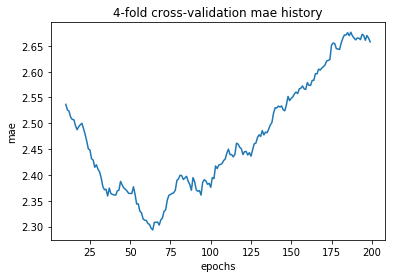

In [56]:
plt.plot(range(10, len(smoothed_history)+10), smoothed_history)
plt.title('4-fold cross-validation mae history')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

**if we use bigger batch, the val mae history will be much smoother**

In [72]:
num_epochs = 800
k = 4
all_mae_history = []
fold_size = len(train_data)//k # use // or fold_size becomes float number
for i in range(k):
    print('processing fold #', i)
    x_val = train_data[fold_size*i : fold_size*(i+1)]
    y_val = train_labels[fold_size*i : fold_size*(i+1)]
    x_train = np.concatenate((train_data[:fold_size*i], train_data[fold_size*(i+1):]), axis=0)
    y_train = np.concatenate((train_labels[:fold_size*i], train_labels[fold_size*(i+1):]), axis=0)
    model = build_model()
    history = model.fit(x_train, y_train, 
                        batch_size=64, epochs=num_epochs, verbose=0, 
                        validation_data=(x_val, y_val))
    all_mae_history.append(history.history['val_mean_absolute_error'])

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


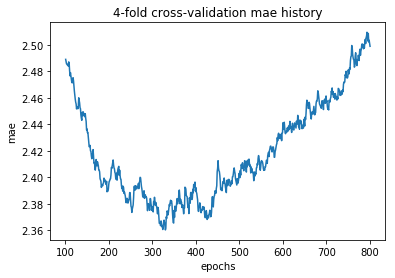

In [73]:
mae_history = np.asarray(all_mae_history).mean(axis=0)
partial_mae_history = smooth_curve(mae_history[100:])
#print('shape of history array: ', partial_mae_history.shape)
epochs = [i+101 for i in range(num_epochs-100)]
plt.plot(epochs, partial_mae_history)
plt.title('4-fold cross-validation mae history')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()

**it becomes harder for the model to overfit with the increase of epochs when using larger batch. seems bigger batch will result in richer combinations of sample in each epoch, so harder to repeat and remember the answer for a specific sample like in the case of batch_size=1**

In [85]:
min_epoch = np.argmin(mae_history)

In [86]:
print(min_epoch)

383


In [91]:
model = build_model()
model.fit(train_data, train_labels, epochs=383, batch_size=64, verbose=0)

In [92]:
model.evaluate(norm_test_data, test_labels)

102/102 [==============================] - 0s 3ms/step


[15.739788579005822, 2.697595848756678]